In [1]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import statsmodels.api as sm
from PSpline import *

In [2]:
p_spline = PSpline()

## Tuning with cross- validation ( Motorcycle data)

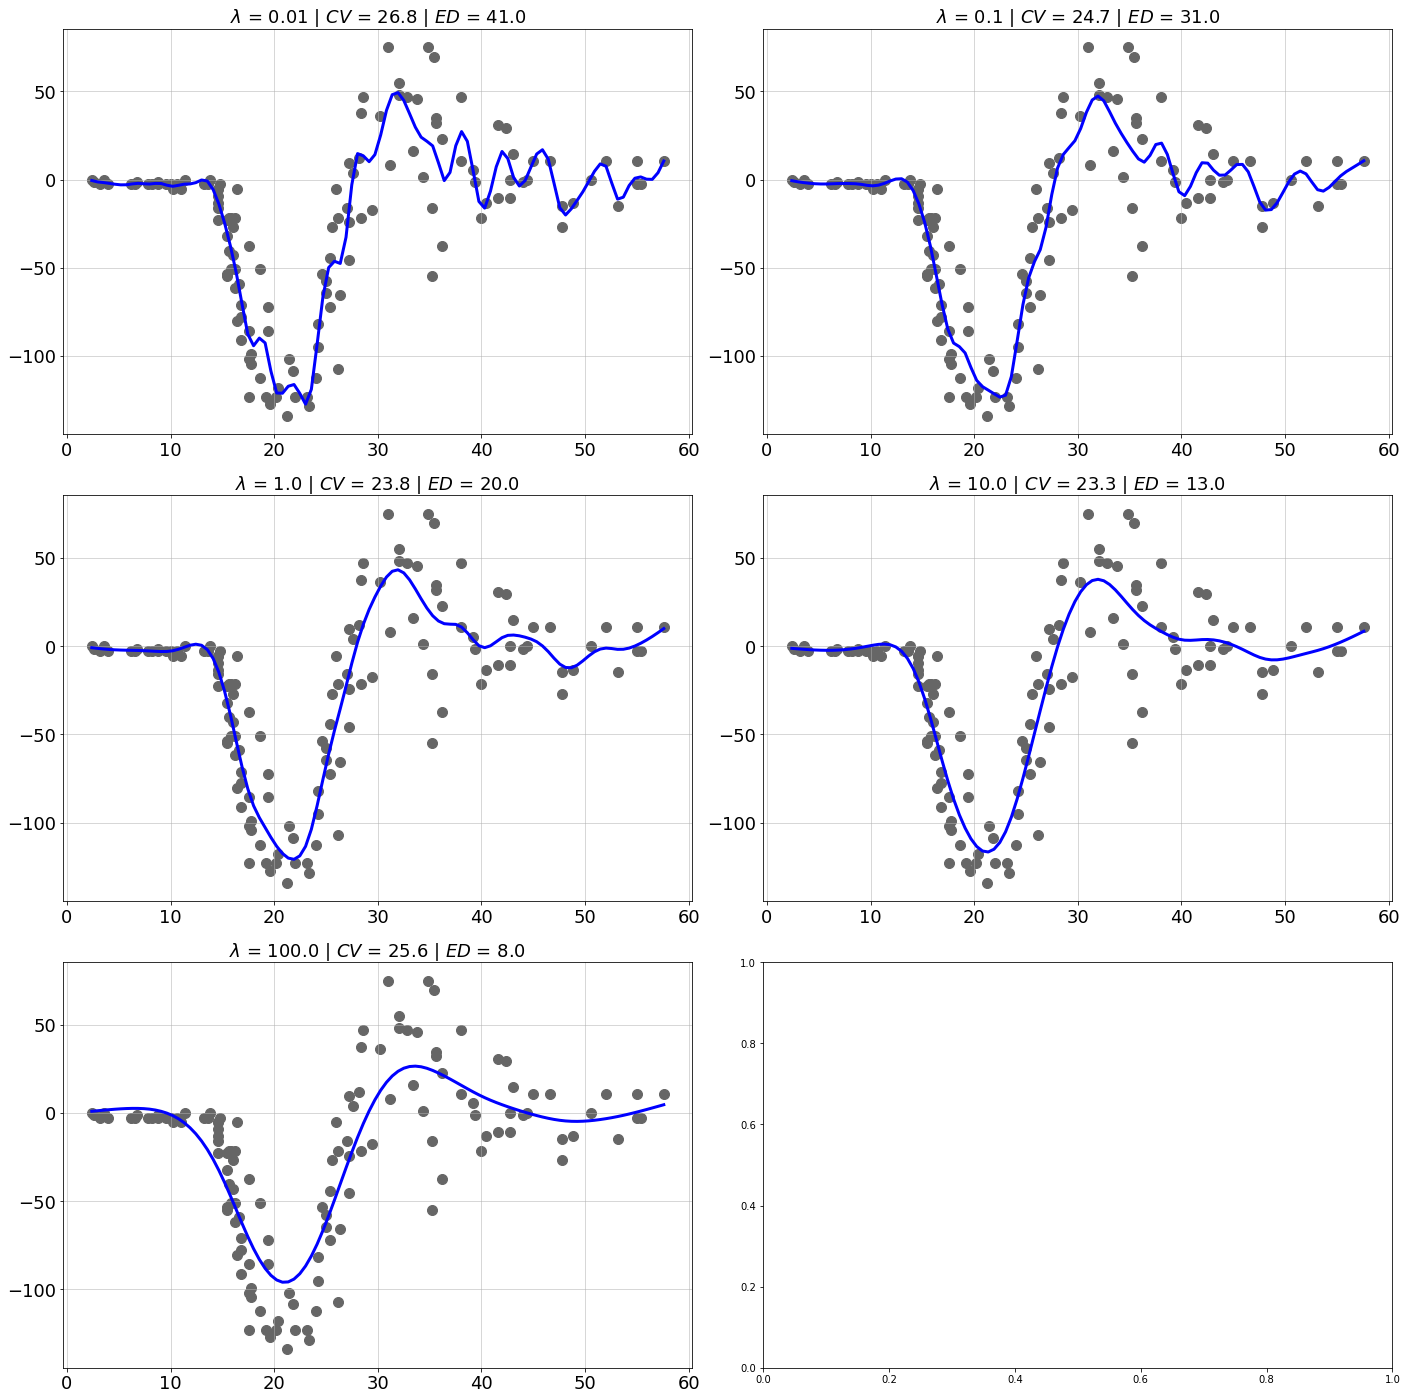

In [8]:
# Get the data
mcycle = sm.datasets.get_rdataset('mcycle', 'MASS').data
x = mcycle.times
y = mcycle.accel

# Basis parameters
n_seg = 50
b_deg = 3
p_ord = 2

fig_row, fig_col = 3, 2
fig, axs = plt.subplots(fig_row, fig_col, figsize=(20, 20))
fig.tight_layout(pad=4.0)
row, col = -1, 0

# Explore 5 lambdas
alphas = np.array([10 ** x for x in range(-2, 3)])
F1 = pd.DataFrame({'x': x, 'y': y})
for k in range(len(alphas)):
    # Fit P-splines
    fit = p_spline.ps_normal(x, y, n_seg=n_seg, b_deg=b_deg, p_ord=p_ord, alpha=alphas[k])
    F2 = pd.DataFrame({'xg': fit['x_grid'], 'yg': fit['y_grid']})
    
    # Build the graphs
    row, col = p_spline.plt_axs_idx(k, fig_col, row, col)
    axs[row, col].scatter(F1.x, F1.y, facecolors='#666666', s=100, zorder=1)
    axs[row, col].plot(F2.xg, F2.yg, c='b', zorder=2, linewidth=3)
    axs[row, col].set_title(f"$\lambda$ = {alphas[k]} | $CV$ = {round(fit['cv'], 1)} | $ED$ = {round(fit['eff_dim'], 0)}", fontsize=18)
    axs[row, col].tick_params(axis='both', labelsize=18)
    axs[row, col].grid(linewidth=0.5)
    axs[row, col].set_x(linewidth=0.5)
    

In [6]:
# Get the data
mcycle = sm.datasets.get_rdataset('mcycle','MASS').data
x = mcycle.times
y = mcycle.accel

# Basis parameters
n_seg = 50
b_deg = 3
p_ord = 2

# Explore 5 lambdas
alphas = 10 ** np.arange(-2, 2)
F1 = pd.DataFrame({'x': x, 'y': y})
for k in range(len(alphas)):
    # Fit P-splines
    fit = p_spline.ps_normal(x, y, n_seg=n_seg, b_deg=b_deg, p_ord=p_ord, alpha=alphas[k])
    a = 0


# Boundary for the subdomain
thr = 5
sel = x > thr
xsel = x[sel]
ysel = y[sel]

# Compute the B-spline basis
deg = 3
xlo = min(x)
xhi = max(x)
ndx = 5
B = p_spline.b_base(x, xlo, xhi, n_seg=ndx, b_deg=deg)

# Basis for fit on grid
ng = 1000
xg = np.linspace(min(x), max(x), num=ng)
Bg = p_spline.b_base(xg, xlo, xhi, n_seg=ndx, b_deg=deg)

# Use 0/1 weight to select the subdomain
W = 1 * np.diag(x > thr)

# Estimate the coefficients and compute fit on the grid
a = np.linalg.solve(B.T @ B, B.T @ y)
z1 = Bg @ a
asel = np.linalg.solve(B.T @ W @ B, B.T @ W @ y)
zsel = Bg @ asel

# Create data frames for plot
Zf1 = pd.DataFrame({'x': xg, 'y': z1, 'id': 1})
Zf2 = pd.DataFrame({'x': xg[xg > thr ], 'y': zsel[xg > thr], 'id': 1})

plt.axhline(y=0, color='black', linewidth=1)
plt.scatter(Data.x, Data.y, s=3, c='black')
plt.plot(Zf1.x, Zf1.y, c='blue')
plt.plot(Zf2.x, Zf2.y, '--', c='red')
plt.title('Motorcycle helmet impact data')
plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (g)")
plt.grid(linewidth=0.5)
plt.show()


ValueError: Integers to negative integer powers are not allowed.